In [1]:
from match import * 
 
PrevTour = None
n = 10
counter = 1
with open("Data.txt","w") as f:
    f.write("Data = [ ")

In [1]:
m = int(pow(2, n))
turnament = Tournament(n - 1) if PrevTour == None else PrevTour
print(turnament)
 
while True:
    turnament.rank()
    # GenData = [   
    #             Match(turnament.ranking[i], turnament.ranking[i + 1]).getResult(
    #                 False
    #             )
    #             for i in range(0, len(turnament.ranking), 2)
    #         ]
    # GenData = [(x,z) for x,y,z,w in GenData]
    # GenData = [x for par in GenData for x in par]
    GenData = [fitness(agent) for agent in turnament.ranking]

    with open("Data.txt", "a") as f:
        f.write(str(GenData) + ", ")
    
    counter += 1
    

    print(counter)
    # print(
    #     Match(turnament.ranking[0], turnament.ranking[1]).getResult(
    #          False
    #     )
    # )
    PrevTour = turnament
    turnament = Tournament(
        reproduce(
            turnament.ranking,
            Keep=m // 2 + m // 32,
            Mixes=m // 16,
            Selections=m // 16,
            SingleMutations=m // 16,
            SlabMutations=m // 32,
            RainMutations=m // 16, 
        )
    )

NameError: name 'n' is not defined

In [7]:
from os import system
system("copy Data.txt Data.py")
with open("Data.py", "a") as f:
            f.write("]")

In [2]:
import Data 
import importlib
from statistics import mode, median
importlib.reload(Data)
 
Max = [max([val for val in gen]) for gen in Data.Data]
Avg = [sum([val for val in gen])/len(gen) for gen in Data.Data]
Mode =[mode([val for val in gen]) for gen in Data.Data]
Median =[median([val for val in gen]) for gen in Data.Data]

c:\Users\bojan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=1.82663e-56): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


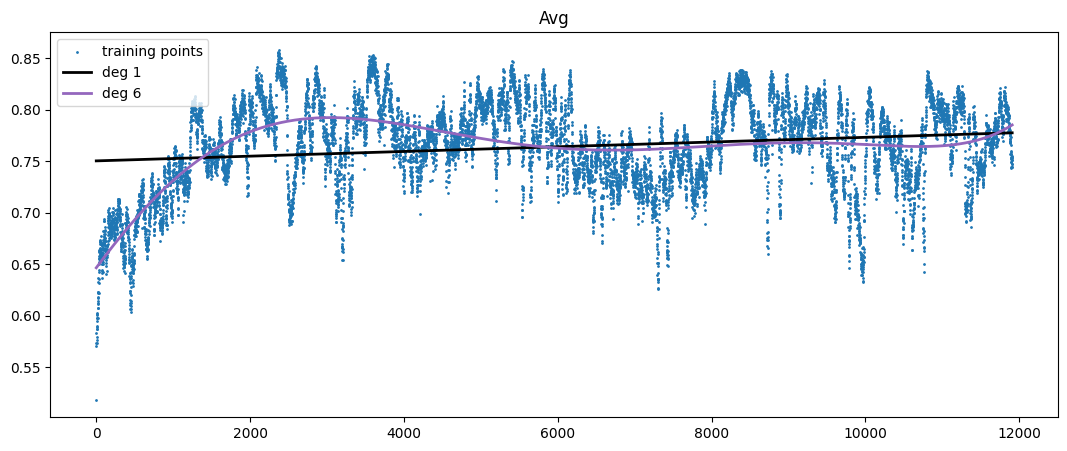

c:\Users\bojan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=1.82663e-56): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


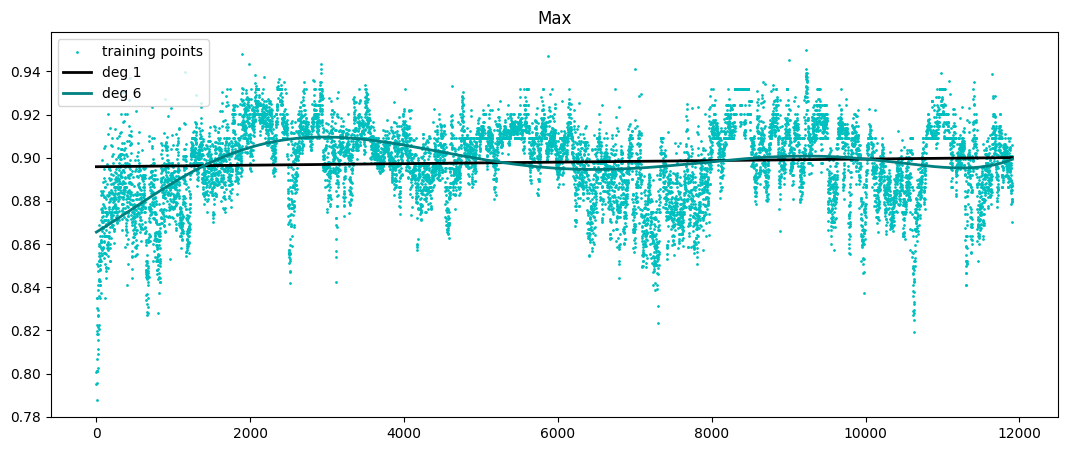

c:\Users\bojan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=1.82663e-56): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


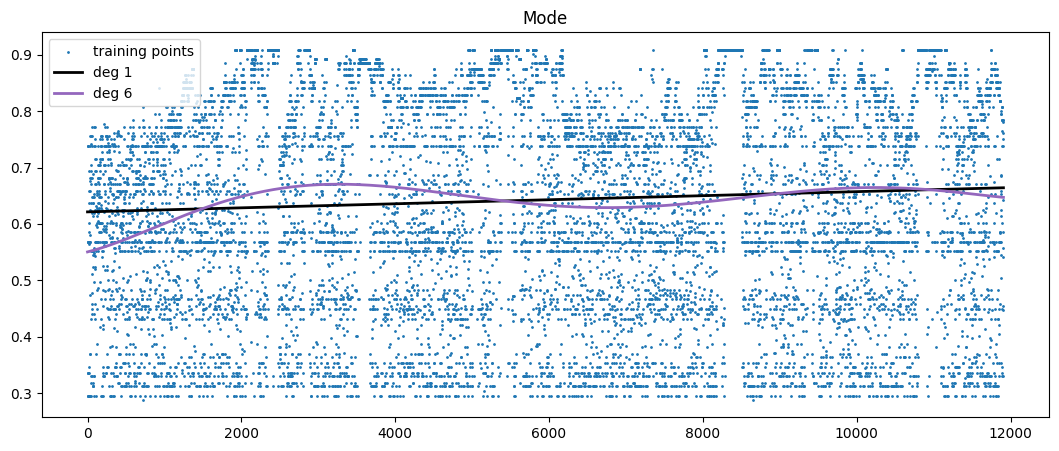

c:\Users\bojan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=1.82663e-56): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


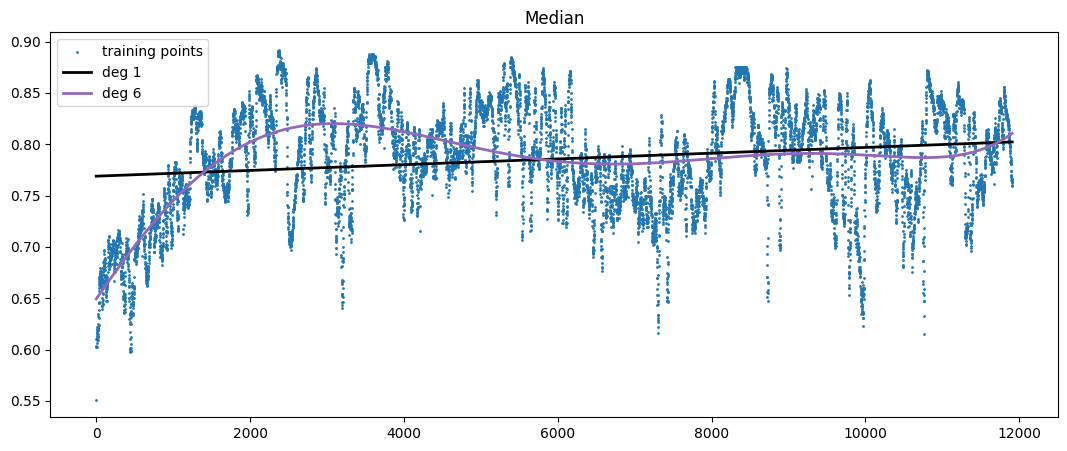

In [31]:
import Ploter as plt
importlib.reload(plt)
plt.plot(Avg,[1,6],{1: 'black', "plot":"tab:blue", 6:"tab:purple" },"Avg")
plt.plot(Max,[1,6],{1: 'black', "plot":"c" , 6: "teal"},"Max")
plt.plot(Mode,[1,6],{1: 'black', "plot":"tab:blue", 6:"tab:purple" },"Mode")
plt.plot(Median,[1,6],{1: 'black', "plot":"tab:blue", 6:"tab:purple" },"Median")
